In [0]:

import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame

In [0]:
df = pd.read_csv("train1.csv")

In [0]:
df=df.replace("LF", "Low Fat")
df=df.replace("low fat", "Low Fat")
df=df.replace("reg","Regular")

In [0]:
le1 = preprocessing.LabelEncoder()
le1.fit(df["Item_Identifier"])
Item_Identifier=le1.transform(df["Item_Identifier"])
df["Item_Identifier"]=Item_Identifier

In [0]:
le2 = preprocessing.LabelEncoder()
le2.fit(df["Item_Fat_Content"])
Item_Fat_Content=le2.transform(df["Item_Fat_Content"])
df["Item_Fat_Content"]=Item_Fat_Content

In [0]:
le3 = preprocessing.LabelEncoder()
le3.fit(df["Item_Type"])
Item_Type=le3.transform(df["Item_Type"])
df["Item_Type"]=Item_Type

In [0]:
le4 = preprocessing.LabelEncoder()
le4.fit(df["Outlet_Identifier"])
Outlet_Identifier=le4.transform(df["Outlet_Identifier"])
df["Outlet_Identifier"]=Outlet_Identifier

In [0]:
le5 = preprocessing.LabelEncoder()
le5.fit(df["Outlet_Location_Type"])
Outlet_Location_Type=le5.transform(df["Outlet_Location_Type"])
df["Outlet_Location_Type"]=Outlet_Location_Type

In [0]:
le6 = preprocessing.LabelEncoder()
le6.fit(df["Outlet_Type"])
Outlet_Type=le6.transform(df["Outlet_Type"])
df["Outlet_Type"]=Outlet_Type

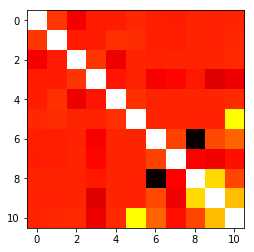

In [14]:
plt.imshow(df.corr(),cmap='hot',interpolation='nearest')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))
df['Outlet_Size'].fillna('Small',inplace=True)
df['Outlet_Establishment_Year'] = 2019 - df['Outlet_Establishment_Year']

In [0]:
mylist = list(df.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(df[mylist], prefix= mylist)

df.drop(mylist, axis=1, inplace = True)

X = pd.concat([df,dummies], axis =1 )

In [20]:
X.head()

Item_Identifier  Item_Weight  ...  Outlet_Size_Medium  Outlet_Size_Small
0              156         9.30  ...                   1                  0
1                8         5.92  ...                   1                  0
2              662        17.50  ...                   1                  0
3             1121        19.20  ...                   0                  1
4             1297         8.93  ...                   0                  0

[5 rows x 14 columns]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X.corr()

Item_Identifier  ...  Outlet_Size_Small
Item_Identifier                   1.000000  ...           0.001748
Item_Weight                       0.048833  ...          -0.013016
Item_Fat_Content                 -0.114660  ...          -0.003079
Item_Visibility                  -0.029189  ...           0.106851
Item_Type                        -0.017973  ...          -0.002507
Item_MRP                          0.012853  ...           0.002734
Outlet_Identifier                -0.008602  ...           0.069160
Outlet_Establishment_Year         0.012772  ...          -0.300724
Outlet_Location_Type              0.003656  ...          -0.420441
Outlet_Type                      -0.001178  ...          -0.608408
Item_Outlet_Sales                 0.002869  ...          -0.208912
Outlet_Size_High                  0.000088  ...          -0.397672
Outlet_Size_Medium               -0.001905  ...          -0.792365
Outlet_Size_Small                 0.001748  ...           1.000000

[14 rows x 14 columns]

In [0]:
reg = LinearRegression()

In [0]:
df1 = X.drop('Item_Outlet_Sales',1)
X1 = df1.drop('Item_Weight',1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X1,df.Item_Outlet_Sales, test_size =0.2)

In [26]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
x_train.head()

Item_Identifier  Item_Fat_Content  ...  Outlet_Size_Medium  Outlet_Size_Small
6814              540                 1  ...                   0                  1
3030             1154                 1  ...                   0                  1
6380              398                 1  ...                   0                  1
3294              843                 1  ...                   0                  1
3569              214                 0  ...                   0                  1

[5 rows x 12 columns]

In [0]:
ypred=reg.predict(x_test)

In [0]:
mse = np.mean((ypred - y_test)**2)

In [30]:
mse

1397885.075049468

In [31]:
reg.score(x_test,y_test)

0.5268642482332844

In [0]:
tdf=pd.read_csv("Test.csv")

In [35]:
tdf=tdf.replace("LF", "Low Fat")
tdf=tdf.replace("low fat", "Low Fat")
tdf=tdf.replace("reg","Regular")
tdf=tdf.drop('Item_Weight',1)
LE1 = preprocessing.LabelEncoder()
LE1.fit(tdf["Item_Identifier"])
Item_Identifier=LE1.transform(tdf["Item_Identifier"])
tdf["Item_Identifier"]=Item_Identifier
LE2 = preprocessing.LabelEncoder()
LE2.fit(tdf["Item_Fat_Content"])
Item_Fat_Content=LE2.transform(tdf["Item_Fat_Content"])
tdf["Item_Fat_Content"]=Item_Fat_Content
LE3 = preprocessing.LabelEncoder()
LE3.fit(tdf["Item_Type"])
Item_Type=LE3.transform(tdf["Item_Type"])
tdf["Item_Type"]=Item_Type
LE4 = preprocessing.LabelEncoder()
LE4.fit(tdf["Outlet_Identifier"])
Outlet_Identifier=LE4.transform(tdf["Outlet_Identifier"])
tdf["Outlet_Identifier"]=Outlet_Identifier
LE5 = preprocessing.LabelEncoder()
LE5.fit(tdf["Outlet_Location_Type"])
Outlet_Location_Type=LE5.transform(tdf["Outlet_Location_Type"])
tdf["Outlet_Location_Type"]=Outlet_Location_Type
LE6 = preprocessing.LabelEncoder()
LE6.fit(tdf["Outlet_Type"])
Outlet_Type=LE6.transform(tdf["Outlet_Type"])
tdf["Outlet_Type"]=Outlet_Type
tdf['Item_Visibility'] = tdf['Item_Visibility'].replace(0,np.mean(tdf['Item_Visibility']))
tdf['Outlet_Size'].fillna('Small',inplace=True)
tdf['Outlet_Establishment_Year'] = 2019 - tdf['Outlet_Establishment_Year']
mylist = list(tdf.select_dtypes(include=['object']).columns)
print(mylist)
dummies = pd.get_dummies(tdf[mylist], prefix= mylist)

tdf.drop(mylist, axis=1, inplace = True)

Xt = pd.concat([tdf,dummies], axis =1 )


['Outlet_Size']


In [36]:
Xt

Item_Identifier  Item_Fat_Content  ...  Outlet_Size_Medium  Outlet_Size_Small
0                1103                 0  ...                   1                  0
1                1067                 1  ...                   0                  1
2                1406                 0  ...                   0                  1
3                 809                 0  ...                   0                  1
4                1184                 1  ...                   1                  0
5                 461                 1  ...                   0                  1
6                 604                 1  ...                   1                  0
7                 266                 0  ...                   1                  0
8                 668                 1  ...                   0                  1
9                 170                 0  ...                   0                  1
10                943                 0  ...                   0                  1
11                807                 0  ...                   0                  1
12               1279                 0  ...                   0                  1
13                966                 0  ...                   1                  0
14                119                 0  ...                   0                  0
15                626                 1  ...                   1                  0
16                500                 0  ...                   0                  1
17                  9                 0  ...                   1                  0
18               1386                 0  ...                   1                  0
19                178                 0  ...                   0                  1
20                165                 0  ...                   0                  0
21               1346                 0  ...                   0                  1
22                420                 0  ...                   0                  1
23               1367                 0  ...                   0                  1
24                867                 0  ...                   0                  1
25               1121                 1  ...                   0                  1
26               1304                 0  ...                   0                  1
27               1291                 0  ...                   0                  1
28                 13                 0  ...                   0                  1
29                327                 0  ...                   0                  1
...               ...               ...  ...                 ...                ...
5651              290                 1  ...                   0                  0
5652              747                 0  ...                   0                  1
5653              704                 1  ...                   0                  1
5654              808                 0  ...                   0                  0
5655             1129                 1  ...                   1                  0
5656              259                 0  ...                   1                  0
5657             1001                 0  ...                   0                  1
5658              602                 0  ...                   0                  0
5659              107                 0  ...                   1                  0
5660              550                 0  ...                   0                  0
5661               58                 0  ...                   1                  0
5662              550                 0  ...                   0                  1
5663               70                 0  ...                   1                  0
5664               14                 1  ...                   1                  0
5665               27                 0  ...                   1                  0
5666              375                 1  ...              

In [0]:
ytest=reg.predict(Xt)

In [38]:
ytest

array([1551.02944278, 1175.4571891 , 1726.93321262, ..., 1897.40880001,
       3147.11526433, 1331.76868228])

In [39]:
for i in ytest:
    print(i)

1551.029442778491
1175.4571890989173
1726.9332126247882
2216.255067185889
4972.204238607208
2219.627135470656
1057.390983792975
2588.6314990809788
1617.7073995307096
2678.795972320073
1565.1141933550653
1367.563103926057
2288.0093257241942
1682.0577883853894
921.40986452591
2216.318604722475
3189.9497293551212
3294.7162960308924
3036.4028287773563
963.9140286404445
2777.1941101474686
3683.8294232746193
1070.0504735748532
854.8182220368906
2866.430056876635
1342.0659960893909
771.3159627599687
2816.650355242564
4139.602945189276
1860.484124235746
-890.8458514697749
3369.317830117965
929.5667179547822
4781.653404236093
2260.1022060817277
4614.5127266985655
2539.5623564493494
-248.6892102589968
2723.210698587359
2947.809457137233
2489.6238211832397
-214.49571025731052
2384.944761370364
2526.228618169431
1343.1944483290308
1777.769914544177
-1283.3776731639232
2860.541629088568
3839.0958821421764
2282.690592309247
1226.0420802022409
1714.1878481779604
2640.58475336269
1706.165986499338
432

In [0]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

#calculating mse

mse = np.mean((pred - y_test)**2)

In [62]:
mse

1414300.1618519423

In [63]:
ridgeReg.score(x_test,y_test)

0.5213083090697384

In [0]:
ridgepred = ridgeReg.predict(Xt)

In [65]:
for i in ridgepred:
    print(i)

1679.8137627994342
1125.8633431479252
1908.460238380862
2125.8541619448674
4826.872937254051
2141.535803388924
1129.1888065075195
2599.498922893208
1636.7341465352383
2569.764234305337
1467.6745561425305
1401.6710359325102
2281.049810408859
1767.429242534672
970.4314219031257
2285.0245847409897
3160.0158371799425
3279.050648804805
3019.1790062891796
1145.066453664078
2699.981611861005
3545.566758576686
1043.5818283892995
976.6880692661643
2830.3864732864836
1571.284921307259
833.9430808622956
2694.0263055377322
3969.989354178735
1878.0307821266015
-702.4813483675849
3355.681481189684
1035.6542058367227
4685.377697811315
2131.1007151628896
4534.102023881008
2525.292071571651
49.08755767037246
2575.6562818391035
2940.1927827017735
2512.030815274833
72.55623892677659
2215.8395499210806
2552.586043091216
1559.8758268321476
1740.9396442074576
-1037.0132104937793
2814.744054257924
3716.3762792753123
2193.938620944074
1189.2312872064276
1682.0145808913921
2519.048926641707
1606.9613042146802


In [52]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.0011, normalize=True)

lassoReg.fit(x_train,y_train)

lassopred = lassoReg.predict(x_test)

# calculating mse

mse = np.mean((lassopred - y_test)**2)

print(mse)



lassoReg.score(x_test,y_test)

1397885.5937692116


0.5268640726645923

In [0]:
lassotest=lassoReg.predict(Xt)

In [47]:
for i in lassotest:
    print(i)

1551.2518120544846
1175.0334704147454
1728.1126422409739
2215.6743559875194
4972.231965922936
2219.01452752969
1057.593719203417
2589.0263419080247
1617.4652375874575
2678.3871450395072
1564.7766451506386
1367.7319850182248
2288.506698813351
1682.530890564034
921.2429616185882
2216.5193549199585
3189.763536155676
3294.4804150620575
3036.7180206746534
964.9085107372648
2776.8847502303997
3683.6143118802174
1069.753817432435
855.3973141626939
2866.1745954173507
1342.9956489706847
771.4165716933949
2816.2373263028444
4138.989235751544
1860.4032984460055
-890.0493331738977
3369.1615262442356
929.8997203403137
4781.624479659969
2259.833914286287
4614.376185562223
2539.9856230805517
-247.23771101623788
2722.755024685918
2948.1178324686025
2489.7883433993084
-213.0559442989337
2384.5493609265227
2526.354895303572
1344.5472118934458
1777.6357691089052
-1281.8660402096457
2860.5035890190175
3838.8611280152654
2282.1804815622804
1225.6249625414052
1713.9481610739936
2639.9506281336744
1705.55209

In [48]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)


ENreg.score(x_test,y_test)


0.4583845819996467

In [0]:
elst=ENreg.predict(Xt)

In [60]:
for i in elst:
    print(i)

1933.3128342292734
833.2166948126919
2801.4051886835264
1906.240122600232
4600.884430881378
1919.1402781493684
975.1161580162343
2222.4471429478963
1599.6910998961412
2382.350287347835
1306.9383124086958
1391.6952187154461
3020.6843742231467
2122.5031752843565
607.5798412216766
2606.863105539847
3186.0269834860665
3233.9014377890117
2655.772508303179
2105.3757606990166
2513.4194025037573
3665.0568675550394
819.2530800023346
1504.2730899200305
2770.795795288664
2336.7081895303054
671.9135858052318
2566.806981884409
3892.6488296686684
1770.0078381744975
-220.18418368045923
3240.425475858957
835.6833078959821
4359.800700673433
2001.943922476697
4182.612382236175
2197.4972061959024
820.4598472095454
2451.045118941359
2561.6617790328746
2411.0731750841765
849.1438024781542
2158.562251428417
2437.7595720515533
2412.0069784828233
1523.6428070641305
-92.60754074968054
2771.2092250342575
3809.3591398278995
2024.292690051428
983.7268569000667
1447.932415670958
2303.319316689789
1403.910829979802